# Content
It includes age and estimated salary of the user. The purchased column indicates weather the particular user with age and estimated salary have bought the product or not by viewing the social ads of the product .

0 : No

1 : Yes

# Importing necessary libraries

In [1]:
# importing necassry libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the data 

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [69]:
# checking for missing values
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Exploratory Data Analysis

In [7]:
df['Age'].nunique()

43

In [8]:
df.count()

Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [9]:
# checking the top 5 most populated age groups
df['Age'].value_counts().head(5)

35    32
37    20
26    16
42    16
41    16
Name: Age, dtype: int64

In [10]:
# Comparing the top 5 most populated age groups to Purchased variable
df[['Age', 'Purchased']].value_counts(ascending=False).head(5)

Age  Purchased
35   0            29
26   0            16
41   0            15
37   0            13
48   1            13
dtype: int64

# Data Visualization

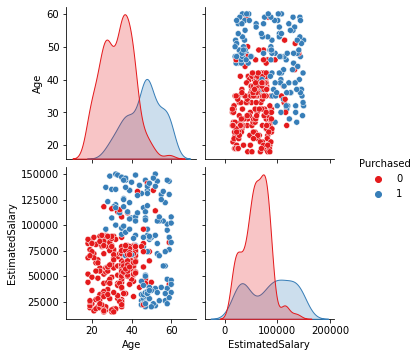

In [11]:
sns.pairplot(data=df,hue='Purchased', palette='Set1')

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

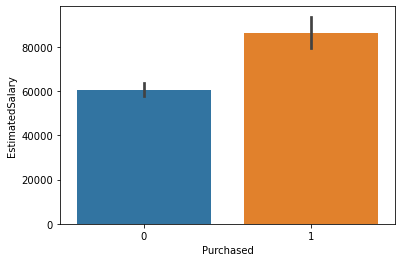

In [12]:
sns.barplot(x='Purchased', y='EstimatedSalary', data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

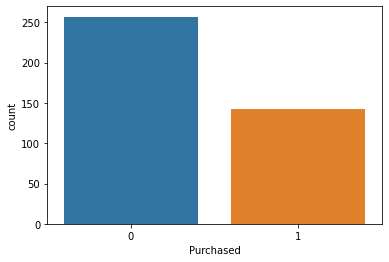

In [13]:
sns.countplot(x='Purchased', data=df)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

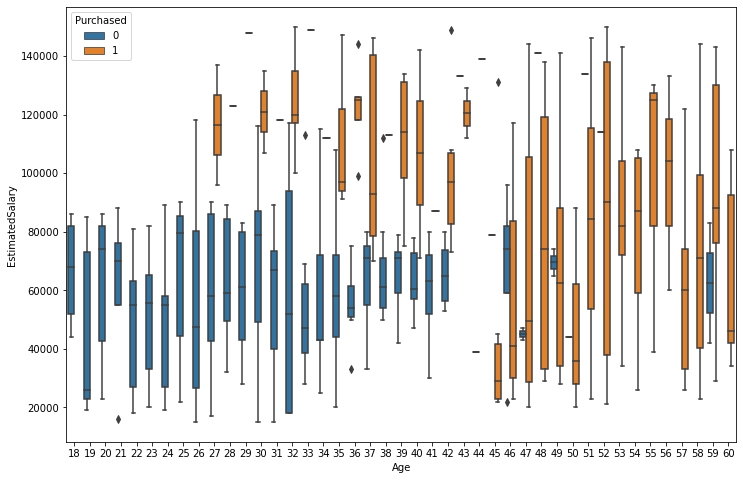

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

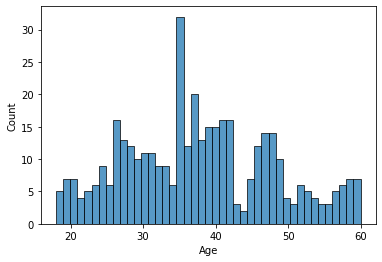

In [15]:
sns.histplot(df['Age'], bins=43)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

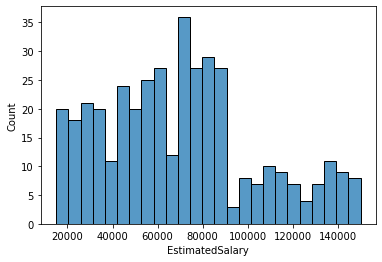

In [71]:
sns.histplot(df['EstimatedSalary'], bins=25)

<AxesSubplot:>

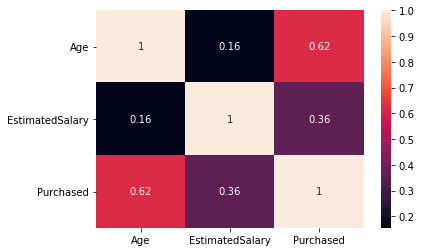

In [17]:
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [24]:
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[70 10]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        80
           1       0.78      0.88      0.82        40

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.88      0.88       120



# Random Forests

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Prediction and Evaluation

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test,rfc_pred))

[[70 10]
 [ 2 38]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        80
           1       0.79      0.95      0.86        40

    accuracy                           0.90       120
   macro avg       0.88      0.91      0.89       120
weighted avg       0.91      0.90      0.90       120



# Support Vector Machines

In [31]:
from sklearn.svm import SVC

In [32]:
model = SVC()

In [33]:
model.fit(X_train, y_train)

SVC()

## Prediction and Evaluation

In [34]:
svc_pred = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[76  4]
 [21 19]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        80
           1       0.83      0.47      0.60        40

    accuracy                           0.79       120
   macro avg       0.80      0.71      0.73       120
weighted avg       0.80      0.79      0.77       120



# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()

In [50]:
logmodel.fit(X_train, y_train)

LogisticRegression()

## Prediction and Evaluation

In [64]:
logmodel_pred = logmodel.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [68]:
print(confusion_matrix(y_test,logmodel_pred))
print(classification_report(y_test,logmodel_pred, zero_division=0))

[[80  0]
 [52  0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.75        80
           1       0.00      0.00      0.00        52

    accuracy                           0.61       132
   macro avg       0.30      0.50      0.38       132
weighted avg       0.37      0.61      0.46       132



# Summary & Conclusion

* The model that performed the best was Random Forest with 90% accuracy
* Most of the people who clicked the ad & purchased the product tend to have a higher salary than those who didnt purchse and seem to be older then the ones who didnt buy
* Altough there more younger age groups that clicked on the ad than then the older age groups; they did not purchase the product 